<div class="alert alert-block alert-info"> 

# ENSEMBLING
In the world of machine learning, ensembling stands as a testament to the age-old adage, 'Unity is strength.' Just as a diverse group of individuals can achieve more together than separately, ensembling leverages the collective power of multiple models to enhance predictive accuracy and robustness. Each individual model, like a unique voice in a choir, contributes its own strengths and weaknesses. 
  
By combining these models, ensembling creates a harmonious symphony of predictions that resonate with unprecedented accuracy and insight, and surpass the capabilities of any single model.

<center>
    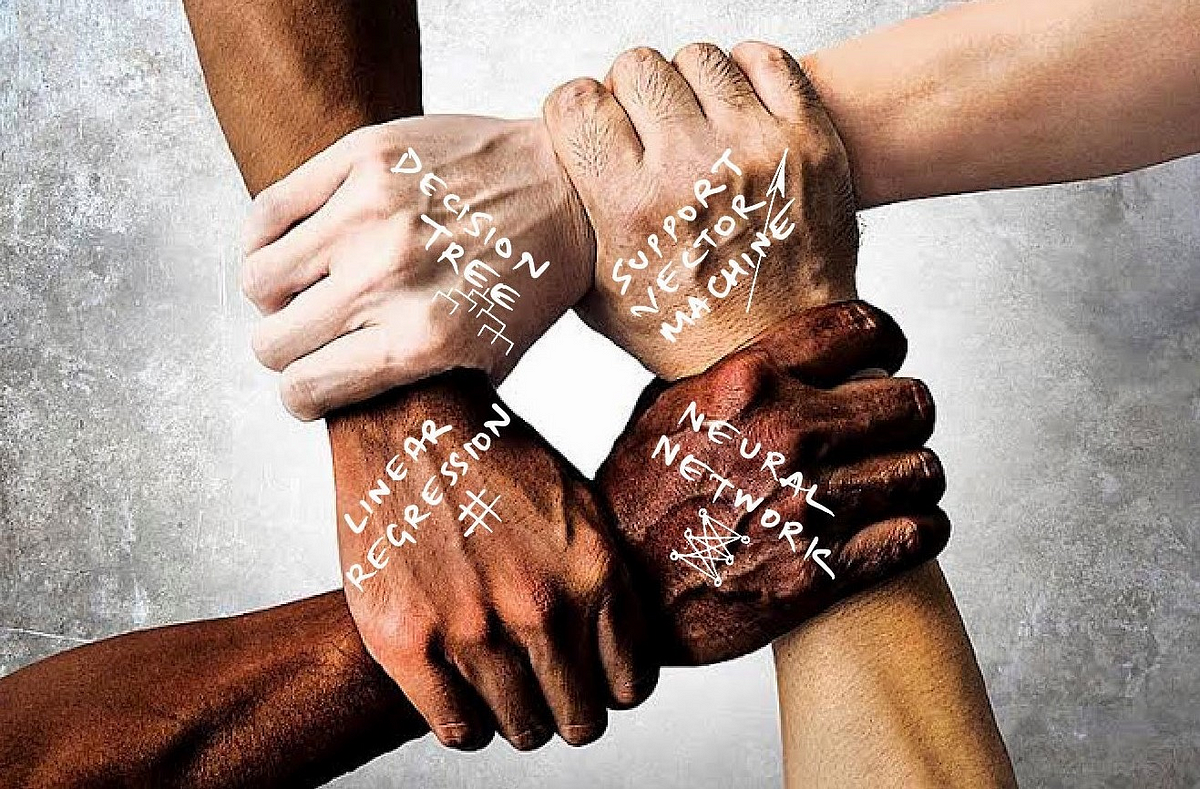
</center>

## GITHUB Repository URL:  
https://github.com/rakesh82rawat?tab=repositories  
  
## KAGGLE Code URL:  
https://www.kaggle.com/rakesh82rawat/code

</div>

# Problem Statement

Five million Americans are currently living with heart diseases, and the numbers are expected to rise. It is very important to understand the factors which causes Heart-attacks so that certain precaution can be taken by individuals. In-order to understand the reasons of the Heart-attack, a data was collected from various hospitals across US which is given in US_Heart_Patients.csv. <span class="mark">In the data set there are Heart-Att indicates whether the person suffered from Heart attack or not.</span>
We will perform EDA on the data and build a models that will predict whether the person will suffer from Heart-attack or not.  
***Using Ensembling we will combine the models to improve the overall prediction Accuracy.***

The Dataset has following variables:

1. **Gender**	        Male/Female
2. **age**             Age of the person
3. **education**       1 indicates High School, 2 indicates- Secondary School,3 indicates Graduation, 4 indicates Post Graduation
4. **currentSmoker**	1 Indicates person is a smoker and 0 indicates non- smoker
5. **cigsPerDay**    	Number of cigrattes consumed in a day
6. **BP Meds**	        1 indidates person is consuming BP medicines and 0 indicates person is not consuming BP medicines
7. **prevalentStroke**	1 indidates person had stroke in the past and 0 indicates person did not suffered from stroke in the past
8. **prevalentHyp**	1 indidates person is suffering from Hypertension  and 0 indicates person is not suffering from hypertension
9. **diabetes**	    1 indicates person is diabatic and 0 indicates person in non-diabetic
10. **tot cholesterol**	Indicates total cholesterol level in the body
11. **Systolic BP**	    Systolic BP of the person
12. **Diastolic BP**	Diastolic BP of the person
13. **BMI**	Indicates   BMI level in the body
14. **heartRate**	    Indicates body heartrate
15. **glucose**	        Glucose level of the body
16. **Heart-Att**	    1 Indicates  person suffered from Heart-attack and 0 indicates that person will not suffer from Heart-attack


In [1]:
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Reading in the data
df = pd.read_csv("/kaggle/input/heart-patient-data/US_Heart_Patients.csv")
df.head()

Gender   age  education  currentSmoker  cigsPerDay  BP Meds  \
0    Male  39.0        4.0            0.0         0.0      0.0   
1  Female  46.0        2.0            0.0         0.0      0.0   
2    Male  48.0        1.0            1.0        20.0      0.0   
3  Female  61.0        3.0            1.0        30.0      0.0   
4  Female  46.0        3.0            1.0        23.0      0.0   

   prevalentStroke  prevalentHyp  diabetes  tot cholesterol  Systolic BP  \
0              0.0           0.0       0.0            195.0        106.0   
1              0.0           0.0       0.0            250.0        121.0   
2              0.0           0.0       0.0            245.0        127.5   
3              0.0           1.0       0.0            225.0        150.0   
4              0.0           0.0       0.0            285.0        130.0   

   Diastolic BP    BMI  heartRate  glucose  Heart-Att  
0          70.0  26.97       80.0     77.0          0  
1          81.0  28.73       95.0     76.0          0  
2          80.0  25.34       75.0     70.0          0  
3          95.0  28.58       65.0    103.0          1  
4          84.0  23.10       85.0     85.0          0

In [3]:
# For EDA - Converting the categorical variables into the actlual level names for better data exploration 
df_EDA = df.copy()
df_EDA['education'] = df_EDA['education'].map({4:'Post-Grad',3:'Grad',2:'Sec School',1:'High School'})
df_EDA['currentSmoker'] = df_EDA['currentSmoker'].map({1:'Yes',0:'No'})
df_EDA['BP Meds'] = df_EDA['BP Meds'].map({1:'Yes',0:'No'})
df_EDA['prevalentStroke'] = df_EDA['prevalentStroke'].map({1:'Yes',0:'No'})
df_EDA['prevalentHyp'] = df_EDA['prevalentHyp'].map({1:'Yes',0:'No'})
df_EDA['diabetes'] = df_EDA['diabetes'].map({1:'Yes',0:'No'})
df_EDA['Heart-Att'] = df_EDA['Heart-Att'].map({1:'Yes',0:'No'})

In [4]:
# Look of the data set after above transformation
df_EDA.head() 

Gender   age    education currentSmoker  cigsPerDay BP Meds  \
0    Male  39.0    Post-Grad            No         0.0      No   
1  Female  46.0   Sec School            No         0.0      No   
2    Male  48.0  High School           Yes        20.0      No   
3  Female  61.0         Grad           Yes        30.0      No   
4  Female  46.0         Grad           Yes        23.0      No   

  prevalentStroke prevalentHyp diabetes  tot cholesterol  Systolic BP  \
0              No           No       No            195.0        106.0   
1              No           No       No            250.0        121.0   
2              No           No       No            245.0        127.5   
3              No          Yes       No            225.0        150.0   
4              No           No       No            285.0        130.0   

   Diastolic BP    BMI  heartRate  glucose Heart-Att  
0          70.0  26.97       80.0     77.0        No  
1          81.0  28.73       95.0     76.0        No  
2          80.0  25.34       75.0     70.0        No  
3          95.0  28.58       65.0    103.0       Yes  
4          84.0  23.10       85.0     85.0        No

In [5]:
# Info of the dataset
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   object 
dtypes: float64(8), object(8)
memory usage: 530.1+ KB


In [6]:
#* PRINT the Size of data set - 4240 observations spread over 16 variables
print('Number of rows : {}'.format(df_EDA.shape[0]))
print('Number of columns : {}'.format(df_EDA.shape[1]))

Number of rows : 4240
Number of columns : 16


In [7]:
# High-level descriptive stats of the data
df_EDA.describe(include='all').T

count unique          top  freq        mean        std  \
Gender             4232      2       Female  2414         NaN        NaN   
age              4238.0    NaN          NaN   NaN   49.579283   8.572875   
education          4130      4  High School  1717         NaN        NaN   
currentSmoker      4237      2           No  2143         NaN        NaN   
cigsPerDay       4209.0    NaN          NaN   NaN    9.001901  11.920742   
BP Meds            4180      2           No  4056         NaN        NaN   
prevalentStroke    4231      2           No  4206         NaN        NaN   
prevalentHyp       4238      2           No  2922         NaN        NaN   
diabetes           4238      2           No  4129         NaN        NaN   
tot cholesterol  4180.0    NaN          NaN   NaN  236.677273  44.616098   
Systolic BP      4236.0    NaN          NaN   NaN   132.36237  22.039244   
Diastolic BP     4235.0    NaN          NaN   NaN   82.901889  11.914467   
BMI              4216.0    NaN          NaN   NaN   25.798916   4.075256   
heartRate        4236.0    NaN          NaN   NaN     75.8678  11.999488   
glucose          3849.0    NaN          NaN   NaN   81.951936  23.958428   
Heart-Att          4240      2           No  3596         NaN        NaN   

                   min    25%     50%    75%    max  
Gender             NaN    NaN     NaN    NaN    NaN  
age               32.0   42.0    49.0   56.0   70.0  
education          NaN    NaN     NaN    NaN    NaN  
currentSmoker      NaN    NaN     NaN    NaN    NaN  
cigsPerDay         0.0    0.0     0.0   20.0   70.0  
BP Meds            NaN    NaN     NaN    NaN    NaN  
prevalentStroke    NaN    NaN     NaN    NaN    NaN  
prevalentHyp       NaN    NaN     NaN    NaN    NaN  
diabetes           NaN    NaN     NaN    NaN    NaN  
tot cholesterol  107.0  206.0   234.0  263.0  696.0  
Systolic BP       83.5  117.0   128.0  144.0  295.0  
Diastolic BP      48.0   75.0    82.0   90.0  142.5  
BMI              15.54  23.07  25.395  28.04   56.8  
heartRate         44.0   68.0    75.0   83.0  143.0  
glucose           40.0   71.0    78.0   87.0  394.0  
Heart-Att          NaN    NaN     NaN    NaN    NaN

In [8]:
#* Separating out the categorical variables and the numeric variables in LIST format
cat_list = list(df_EDA.dtypes[df_EDA.dtypes=='object'].index)
num_list = list(df_EDA.dtypes[df_EDA.dtypes!='object'].index)

#OR
#cat_list1 = [f for f in df_EDA if df_EDA.dtypes[f] == 'object']
#num_list1 = [f for f in df_EDA if df_EDA.dtypes[f] != 'object']

In [9]:
print(' CAT_LIST:{}'.format(len(cat_list)),'\n',cat_list,'\n','\n',"NUM_LIST:{}".format(len(num_list)),'\n',num_list)

 CAT_LIST:8 
 ['Gender', 'education', 'currentSmoker', 'BP Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'Heart-Att'] 
 
 NUM_LIST:8 
 ['age', 'cigsPerDay', 'tot cholesterol', 'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose']


In [10]:
df_EDA.isna().sum()[df_EDA.isna().sum()>0]

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot cholesterol     60
Systolic BP          4
Diastolic BP         5
BMI                 24
heartRate            4
glucose            391
dtype: int64

In [11]:
# OR..
# Missing Value analysis 
missing = pd.DataFrame(df_EDA.isnull().sum())
missing.reset_index(inplace=True)
missing.columns = ['Variable','Missing_values']
missing.sort_values(by = 'Missing_values',ascending=False)

Variable  Missing_values
14          glucose             391
2         education             110
5           BP Meds              60
9   tot cholesterol              60
4        cigsPerDay              31
12              BMI              24
6   prevalentStroke               9
0            Gender               8
11     Diastolic BP               5
10      Systolic BP               4
13        heartRate               4
3     currentSmoker               3
1               age               2
7      prevalentHyp               2
8          diabetes               2
15        Heart-Att               0

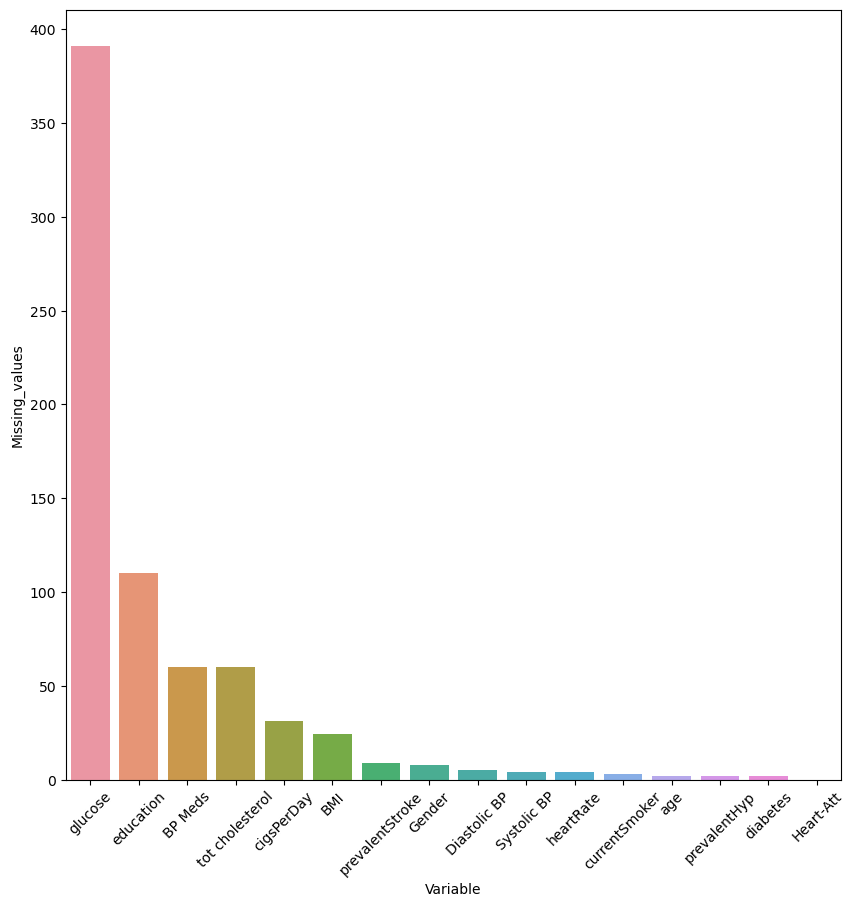

In [12]:
#* PlLOTTING the number of missing values per variable

fig,axes = plt.subplots(figsize=(10,10))

sns.barplot(x='Variable',y='Missing_values',data=missing.sort_values(by='Missing_values',ascending=False))
axes.set_xticklabels(labels = list(missing.sort_values(by = 'Missing_values',ascending=False)['Variable']),rotation=45)

plt.show()

In [13]:
#* Imputing the missing values in the num & cat variables using simpleimputer (& JOINING)

from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy = 'median')
imputer_cat = SimpleImputer(strategy = 'most_frequent')

df_num = pd.DataFrame(imputer_num.fit_transform(df_EDA[num_list]),columns=num_list)
df_cat = pd.DataFrame(imputer_cat.fit_transform(df_EDA[cat_list]),columns=cat_list)

#* JOINING
df_EDA2=df_num.join(df_cat)
df_EDA2.isnull().sum()

age                0
cigsPerDay         0
tot cholesterol    0
Systolic BP        0
Diastolic BP       0
BMI                0
heartRate          0
glucose            0
Gender             0
education          0
currentSmoker      0
BP Meds            0
prevalentStroke    0
prevalentHyp       0
diabetes           0
Heart-Att          0
dtype: int64

In [14]:
# Checking for duplicate rows
dups = df_EDA2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [15]:
# zip Fn

x = ['a','b','c']
y = ['x','y','z']
for i,j in zip(x,y):
    print("Element in x :{}".format(i))
    print("Element in y :{}".format(j))
    print()
    
    
#> The zip() function is used to combine multiple iterables (like lists, tuples, etc.) element-wise 
   #into a single iterable. Here, x and y are being combined element by element, 
   #and then we iterate through these pairs using a loop.    

Element in x :a
Element in y :x

Element in x :b
Element in y :y

Element in x :c
Element in y :z



In [16]:
# Dataset ready for EDA : df_EDA2 
df_EDA2.head()

age  cigsPerDay  tot cholesterol  Systolic BP  Diastolic BP    BMI  \
0  39.0         0.0            195.0        106.0          70.0  26.97   
1  46.0         0.0            250.0        121.0          81.0  28.73   
2  48.0        20.0            245.0        127.5          80.0  25.34   
3  61.0        30.0            225.0        150.0          95.0  28.58   
4  46.0        23.0            285.0        130.0          84.0  23.10   

   heartRate  glucose  Gender    education currentSmoker BP Meds  \
0       80.0     77.0    Male    Post-Grad            No      No   
1       95.0     76.0  Female   Sec School            No      No   
2       75.0     70.0    Male  High School           Yes      No   
3       65.0    103.0  Female         Grad           Yes      No   
4       85.0     85.0  Female         Grad           Yes      No   

  prevalentStroke prevalentHyp diabetes Heart-Att  
0              No           No       No        No  
1              No           No       No        No  
2              No           No       No        No  
3              No          Yes       No       Yes  
4              No           No       No        No

## Univariate Analysis 

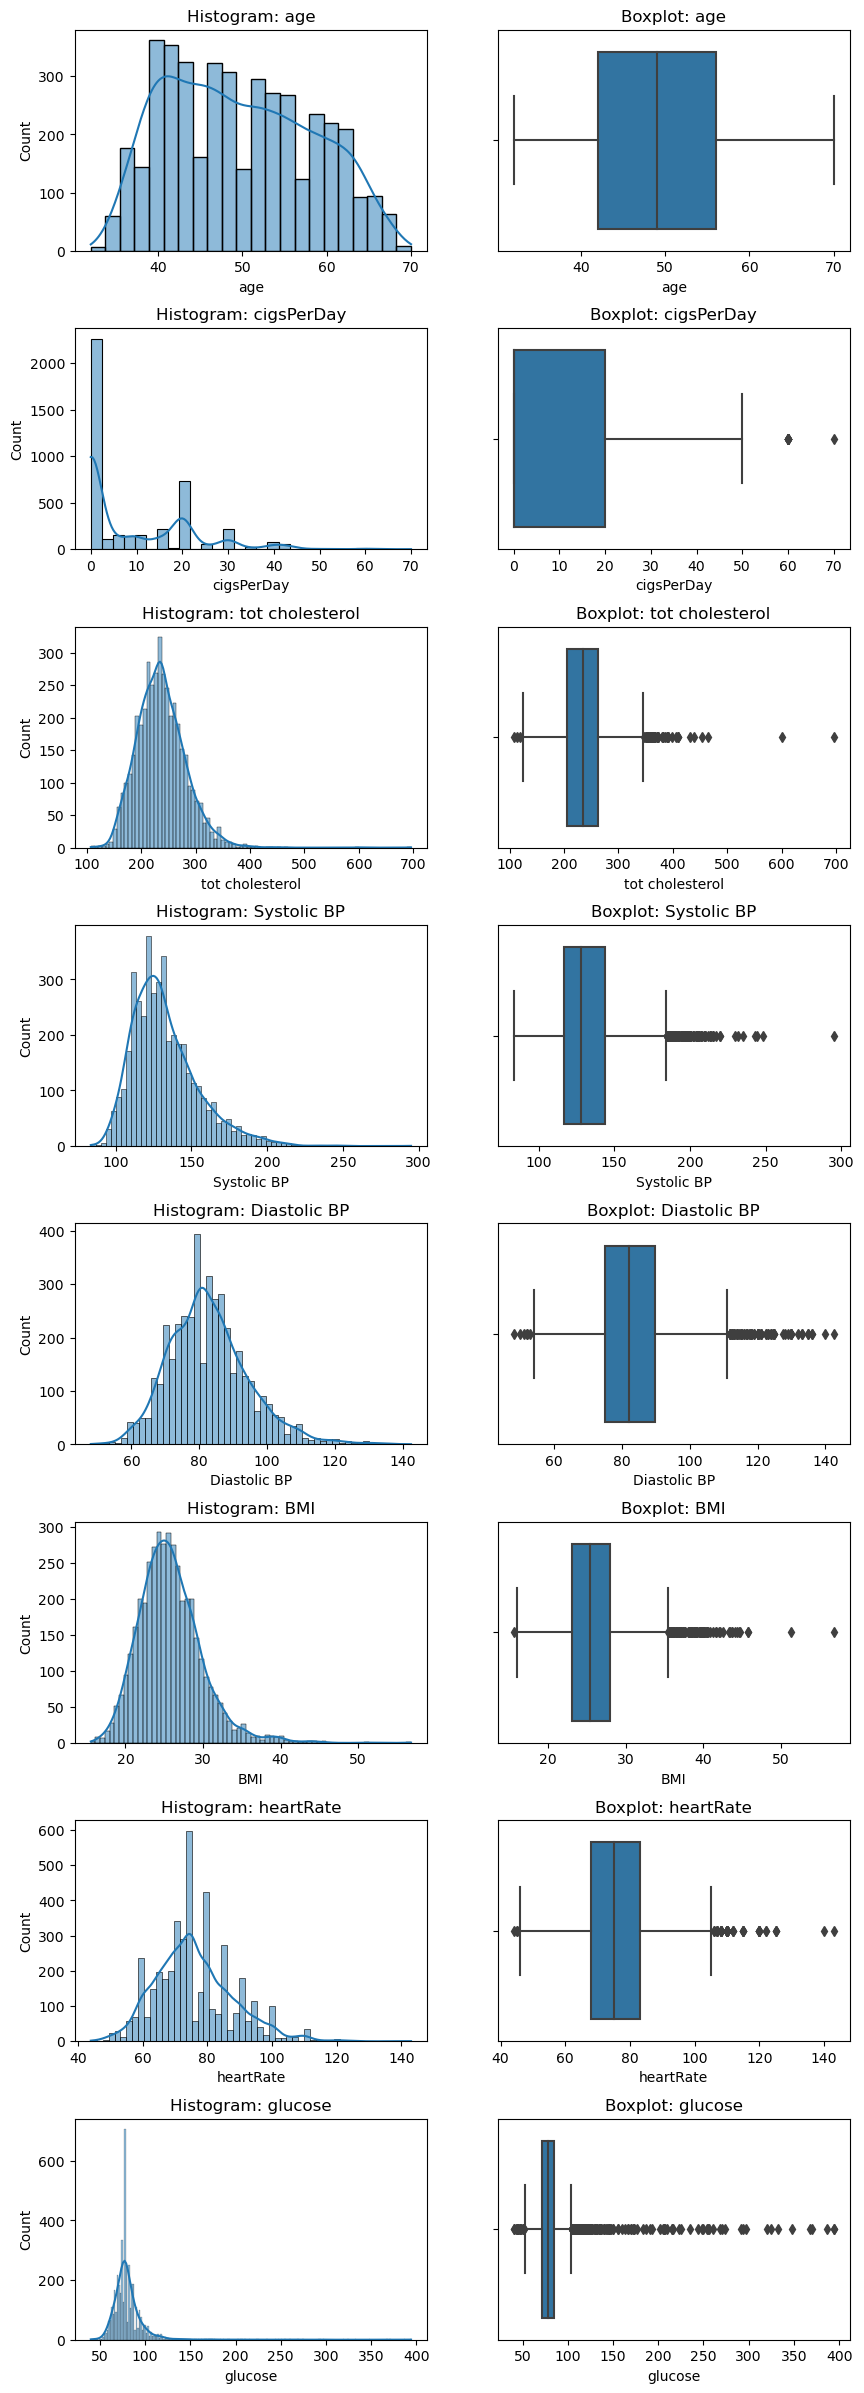

In [17]:
#* SUBPLOTS (n X 2) for Numeric Variables

fig,axes = plt.subplots(8,2,figsize=(10,30))
plt.subplots_adjust(hspace=0.35) #wspace

for i,j in zip(num_list,axes):
    sns.histplot(x=i,kde=True,data = df_EDA2,ax=j[0]) #Histplot
    j[0].set_title('Histogram: '+i)                   #Title of Histplot
    
    sns.boxplot(x=i,data=df_EDA2,ax=j[1],orient='h')  #Boxplot
    j[1].set_title('Boxplot: '+i)                     #Title of Boxplot

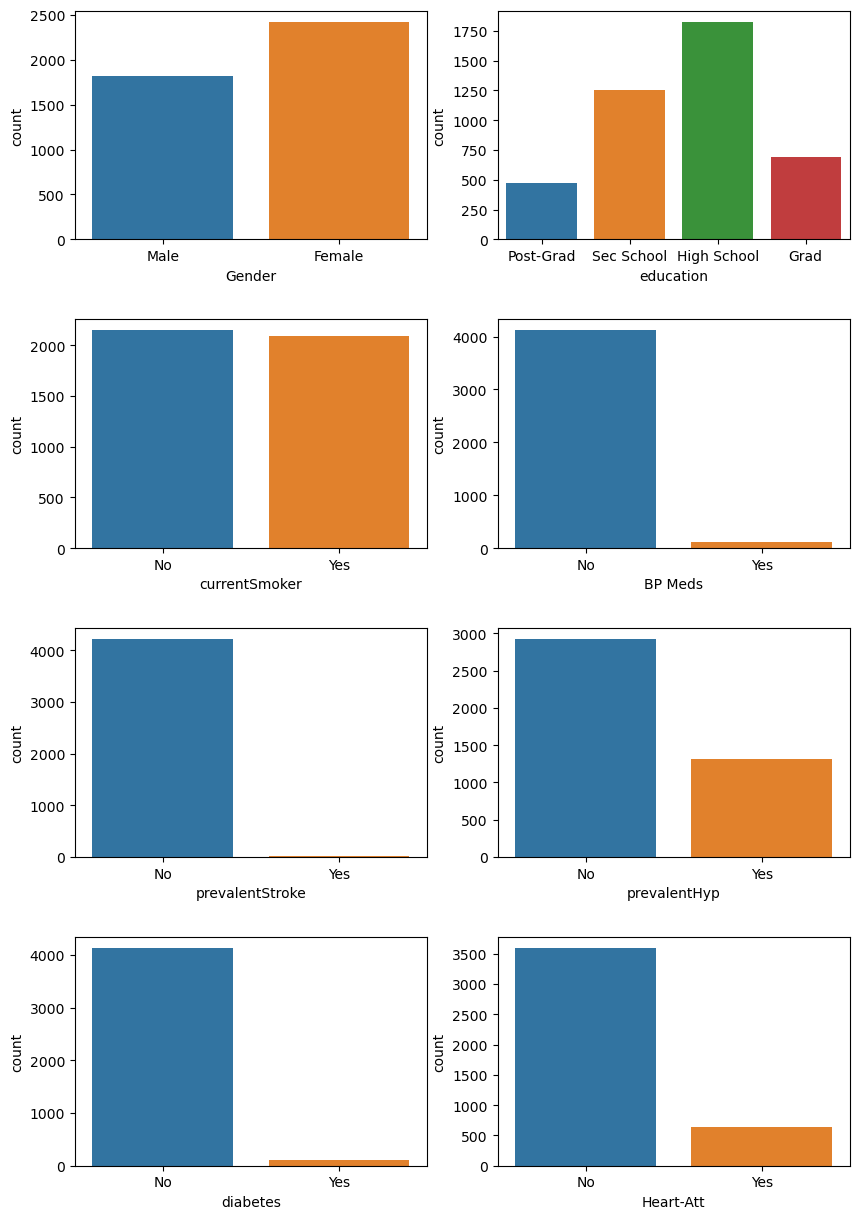

In [18]:
#* Univariate Analysis of the Categorical Variables (flatten used here bcs only 1 type of plot (count-plot needed )
fig,axes = plt.subplots(4,2,figsize=(10,15))
plt.subplots_adjust(hspace=0.35) #wspace

for i,j in zip(cat_list,axes.flatten()):
    sns.countplot(x=i,data=df_EDA2,ax=j) 

In [19]:
#* Looking at the proportions of the categorical variables
for i in cat_list:
    print(i.upper(),': ',df_EDA2[i].nunique())
    print(df_EDA[i].value_counts(normalize=True).sort_values())
    print('\n')

GENDER :  2
Male      0.429584
Female    0.570416
Name: Gender, dtype: float64


EDUCATION :  4
Post-Grad      0.114528
Grad           0.166586
Sec School     0.303148
High School    0.415738
Name: education, dtype: float64


CURRENTSMOKER :  2
Yes    0.494218
No     0.505782
Name: currentSmoker, dtype: float64


BP MEDS :  2
Yes    0.029665
No     0.970335
Name: BP Meds, dtype: float64


PREVALENTSTROKE :  2
Yes    0.005909
No     0.994091
Name: prevalentStroke, dtype: float64


PREVALENTHYP :  2
Yes    0.310524
No     0.689476
Name: prevalentHyp, dtype: float64


DIABETES :  2
Yes    0.02572
No     0.97428
Name: diabetes, dtype: float64


HEART-ATT :  2
Yes    0.151887
No     0.848113
Name: Heart-Att, dtype: float64




## Multi-Variate Analysis

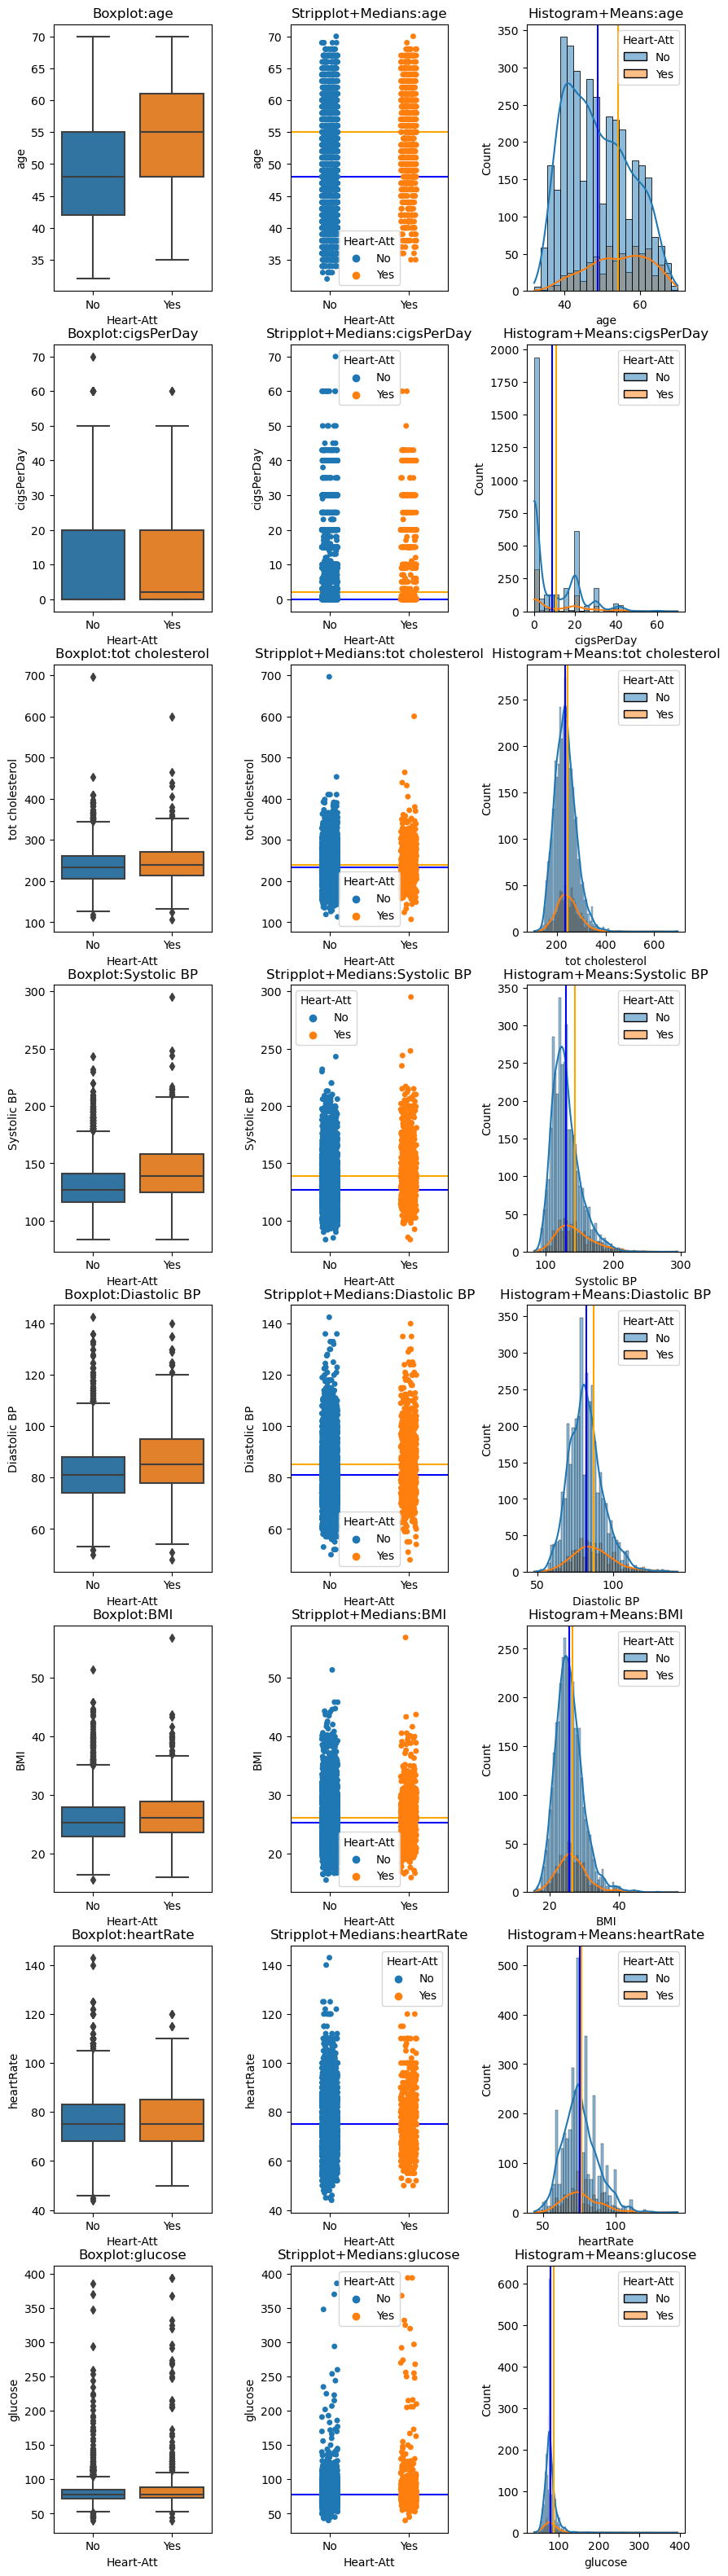

In [20]:
#* Comparing the numerical variables of individuals w.r.t their Heart attack status 
   #(Diff. plot types with mul.plots in single axes)
    
fig,axes = plt.subplots(8,3,figsize=(10,40))
plt.subplots_adjust(hspace=0.2,wspace=0.5)

for i,j in zip(num_list,axes):
    
    sns.boxplot(x='Heart-Att',y=i,data=df_EDA2,ax=j[0]) # box plot 
    j[0].set_title('Boxplot:'+i)  # Adding title to the PLot
    
    sns.stripplot(x='Heart-Att',y=i,data=df_EDA2,ax=j[1], hue='Heart-Att') # strip plot    
    j[1].axhline(np.median(df_EDA2[df_EDA2['Heart-Att']=='Yes'][i]),color='orange') # Adding Horizontal Lines
    j[1].axhline(np.median(df_EDA2[df_EDA2['Heart-Att']=='No'][i]),color='blue') # Adding Horizontal Lines
    j[1].set_title('Stripplot+Medians:'+i) # Adding the Title
    
    sns.histplot(x=i,data=df_EDA2,hue='Heart-Att',ax=j[2],kde=True) 
    j[2].axvline(np.mean(df_EDA2[df_EDA2['Heart-Att']=='Yes'][i]),color='orange')
    j[2].axvline(np.mean(df_EDA2[df_EDA2['Heart-Att']=='No'][i]),color='blue')
    j[2].set_title('Histogram+Means:'+i)

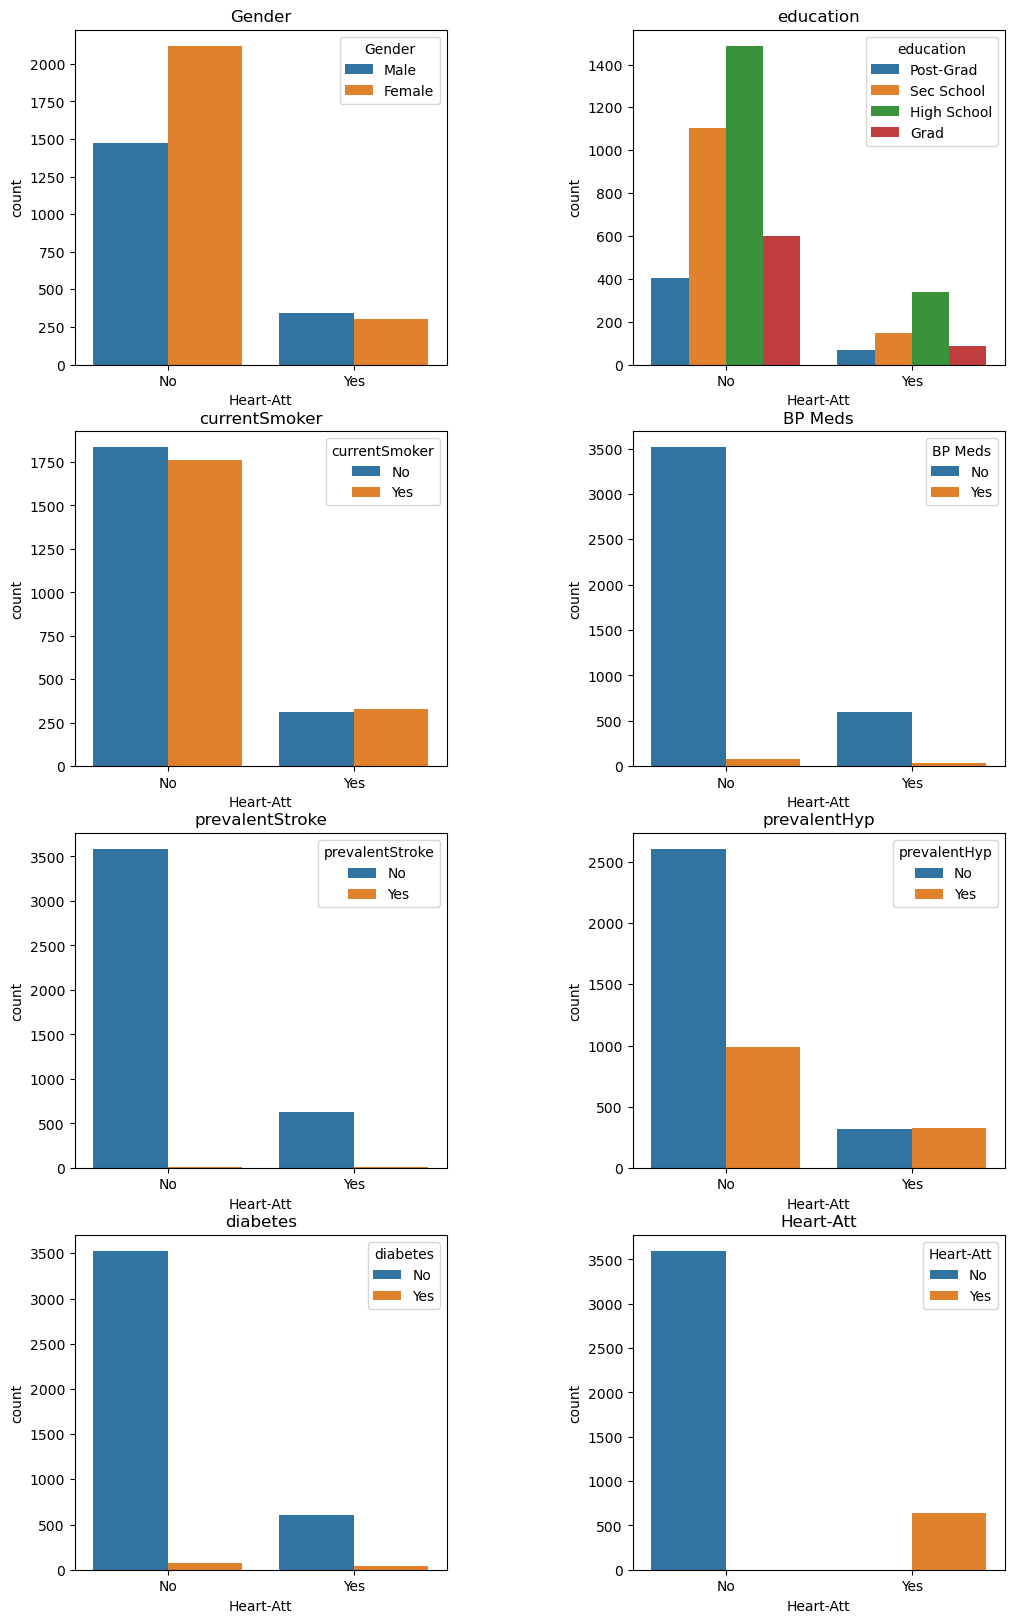

In [21]:
# Comparing the Categorical variables of individuals w.r.t their Heart attack status

fig,axes = plt.subplots(4,2,figsize=(12,20))
plt.subplots_adjust(wspace=.5)

for i,j in zip(cat_list,axes.flatten()):
    sns.countplot(x='Heart-Att',data=df_EDA2,hue=i,ax=j)
    j.set_title(i)

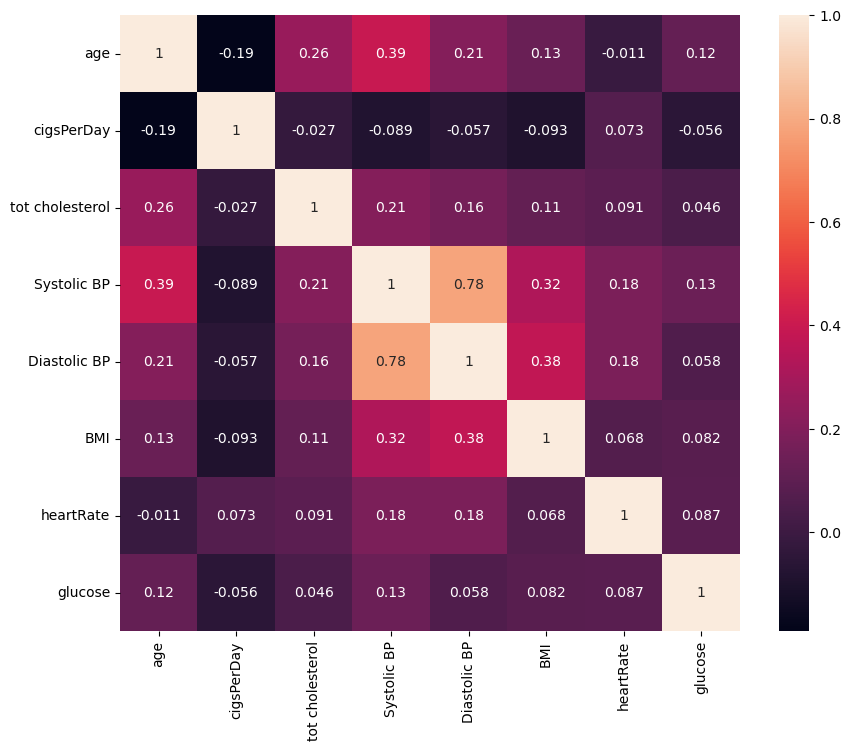

In [22]:
# Correlation-plot
plt.figure(figsize=(10,8))
sns.heatmap(df_EDA2.corr(),annot=True)
plt.show()

## Preparing the dataset for modelling 

In [23]:
# Encoding the categorical variables
df_Mod = df_EDA2.copy()
df_Mod['Gender'] = df_Mod['Gender'].map({'Male':1,'Female':0})
df_Mod['education'] = df_Mod['education'].map({'Post-Grad':4,'Grad':3,'Sec School':2,'High School':1})
df_Mod['currentSmoker'] = df_Mod['currentSmoker'].map({'Yes':1,'No':0})
df_Mod['BP Meds'] = df_Mod['BP Meds'].map({'Yes':1,'No':0})
df_Mod['prevalentStroke'] = df_Mod['prevalentStroke'].map({'Yes':1,'No':0})
df_Mod['prevalentHyp'] = df_Mod['prevalentHyp'].map({'Yes':1,'No':0})
df_Mod['diabetes'] = df_Mod['diabetes'].map({'Yes':1,'No':0})
df_Mod['Heart-Att'] = df_Mod['Heart-Att'].map({'Yes':1,'No':0})

In [24]:
# Separtaing out the independent and dependent variables
X = df_Mod.drop('Heart-Att',axis=1)
y = df_Mod['Heart-Att']

In [25]:
# Splitting into train and test (75/25)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify = y)

In [26]:
X_train.head()

age  cigsPerDay  tot cholesterol  Systolic BP  Diastolic BP    BMI  \
686   48.0         0.0            215.0        127.0          81.0  24.87   
1032  45.0         3.0            218.0        145.0          90.0  26.65   
1879  61.0         0.0            234.0        115.0          60.0  25.50   
1959  48.0        15.0            229.0        111.0          85.0  24.10   
2712  41.0         3.0            309.0        113.0          74.0  25.40   

      heartRate  glucose  Gender  education  currentSmoker  BP Meds  \
686        76.0     76.0       1          2              0        0   
1032       76.0     70.0       1          4              1        0   
1879       76.0     99.0       0          1              0        0   
1959       75.0     74.0       0          1              1        0   
2712       75.0     64.0       1          1              1        0   

      prevalentStroke  prevalentHyp  diabetes  
686                 0             0         0  
1032                0             1         0  
1879                0             0         0  
1959                0             0         0  
2712                0             0         0

## MODELS

### Naive Bayes

In [27]:
#Naive Bayes Model 
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train)

GaussianNB()

In [28]:
#Predictions and metrics(Train & Test) ????
import sklearn.metrics as metrics
pred_train_NB_model = NB_model.predict(X_train)
pred_test_NB_model = NB_model.predict(X_test)

print('Train Accuracy: {}'.format(NB_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(NB_model.score(X_test,y_test)))
print()   # gap

print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_NB_model))
print()   # gap

print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_NB_model))

Train Accuracy: 0.8315363881401617
Test Accuracy: 0.8144654088050315

Classification Report Train
              precision    recall  f1-score   support

           0       0.87      0.95      0.90      2517
           1       0.39      0.20      0.26       451

    accuracy                           0.83      2968
   macro avg       0.63      0.57      0.58      2968
weighted avg       0.80      0.83      0.81      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1079
           1       0.33      0.21      0.26       193

    accuracy                           0.81      1272
   macro avg       0.60      0.57      0.58      1272
weighted avg       0.79      0.81      0.80      1272



### Linear Discriminant Analysis

In [29]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

model_LDA= LinearDiscriminantAnalysis(shrinkage='auto')
params_LDA = {'solver':['svd','eigen','lsqr']} # Parameter Grid 
grid_search_LDA = GridSearchCV(estimator = model_LDA, param_grid = params_LDA, cv = 3,n_jobs=-1,scoring='precision',verbose=2)

grid_search_LDA.fit(X_train, y_train)
LDA_model = grid_search_LDA.best_estimator_ 

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [30]:
#Predictions and metrics(Train & Test)
pred_train_LDA_model = LDA_model.predict(X_train)
pred_test_LDA_model = LDA_model.predict(X_test)
print('Train Accuracy: {}'.format(LDA_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(LDA_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_LDA_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_LDA_model))

Train Accuracy: 0.8537735849056604
Test Accuracy: 0.839622641509434

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2517
           1       0.60      0.12      0.20       451

    accuracy                           0.85      2968
   macro avg       0.73      0.55      0.56      2968
weighted avg       0.82      0.85      0.81      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1079
           1       0.38      0.09      0.15       193

    accuracy                           0.84      1272
   macro avg       0.62      0.53      0.53      1272
weighted avg       0.79      0.84      0.80      1272



### Decision Tree

In [31]:
# Decision Tree
np.random.seed(1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
model_DT = DecisionTreeClassifier()
params_DT = {'criterion':['gini','entropy'],
         'max_depth':list(range(159,501)),
         'min_samples_split':list(range(1,201)),
         'min_samples_leaf':list(range(1,20)),
         'min_impurity_decrease':list(np.random.normal(0.004,.005,500)),
         'min_impurity_decrease':list(np.random.normal(0,.005,500))}
grid_search_DT = RandomizedSearchCV(estimator = model_DT, param_distributions = params_DT, cv = 10,n_jobs=-1,scoring='precision',verbose=2)
grid_search_DT.fit(X_train,y_train)
DT_model = grid_search_DT.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [32]:
grid_search_DT.best_estimator_

DecisionTreeClassifier(max_depth=173,
                       min_impurity_decrease=0.0015900714820958443,
                       min_samples_split=58)

In [33]:
#Predictions and metrics(Train & Test)
pred_train_DT_model = DT_model.predict(X_train)
pred_test_DT_model = DT_model.predict(X_test)
print('Train Accuracy: {}'.format(DT_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(DT_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_DT_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_DT_model))

Train Accuracy: 0.851078167115903
Test Accuracy: 0.8498427672955975

Classification Report Train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2517
           1       0.85      0.02      0.05       451

    accuracy                           0.85      2968
   macro avg       0.85      0.51      0.48      2968
weighted avg       0.85      0.85      0.79      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1079
           1       0.67      0.02      0.04       193

    accuracy                           0.85      1272
   macro avg       0.76      0.51      0.48      1272
weighted avg       0.82      0.85      0.79      1272



### Random Forest Model

In [34]:
# Random Forest
np.random.seed(1)
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()
params_RF = {'criterion':['gini','entropy'],
         'n_estimators':list(range(101,902,2)),
         'min_samples_leaf':list(range(1,10)),
         'max_features':list(range(1,15)),
         'max_samples':list(np.arange(0.1,1))}
grid_search_RF = RandomizedSearchCV(estimator = model_RF, param_distributions = params_RF, cv = 10,n_jobs=-1,scoring='precision',verbose=2)
grid_search_RF.fit(X_train,y_train)
RF_model = grid_search_RF.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [35]:
grid_search_RF.best_params_

{'n_estimators': 689,
 'min_samples_leaf': 3,
 'max_samples': 0.1,
 'max_features': 14,
 'criterion': 'entropy'}

In [36]:
#Predictions and metrics(Train & Test)
pred_train_RF_model = RF_model.predict(X_train)
pred_test_RF_model = RF_model.predict(X_test)
print('Train Accuracy: {}'.format(RF_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(RF_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_RF_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_RF_model))

Train Accuracy: 0.8547843665768194
Test Accuracy: 0.85062893081761

Classification Report Train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2517
           1       0.95      0.05      0.09       451

    accuracy                           0.85      2968
   macro avg       0.90      0.52      0.50      2968
weighted avg       0.87      0.85      0.79      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1079
           1       1.00      0.02      0.03       193

    accuracy                           0.85      1272
   macro avg       0.93      0.51      0.47      1272
weighted avg       0.87      0.85      0.78      1272



### K-NN

In [37]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

from sklearn.pipeline import Pipeline
pipeline_KNN = Pipeline(steps = [('std_scaler',std_scaler),('model_KNN',model_KNN)])
params_KNN = {'model_KNN__n_neighbors':list(range(1,21,2)),
         'model_KNN__weights':['uniform','distance'],
         'model_KNN__metric':['euclidean','chebyshev','manhattan']}

grid_search_KNN = GridSearchCV(pipeline_KNN,param_grid = params_KNN,scoring = 'precision',cv=10,n_jobs=-1)
grid_search_KNN.fit(X_train,y_train)
KNN_model = grid_search_KNN.best_estimator_

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [38]:
grid_search_KNN.best_params_

{'model_KNN__metric': 'manhattan',
 'model_KNN__n_neighbors': 19,
 'model_KNN__weights': 'distance'}

In [39]:
#Predictions and metrics(Train & Test)
pred_train_KNN_model = KNN_model.predict(X_train)
pred_test_KNN_model = KNN_model.predict(X_test)
print('Train Accuracy: {}'.format(KNN_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(KNN_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_KNN_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_KNN_model))

Train Accuracy: 1.0
Test Accuracy: 0.8466981132075472

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2517
           1       1.00      1.00      1.00       451

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1079
           1       0.42      0.03      0.05       193

    accuracy                           0.85      1272
   macro avg       0.63      0.51      0.48      1272
weighted avg       0.78      0.85      0.78      1272



In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_model, X_train, y_train, cv=10)
scores.mean()

0.8517540267540268

### K-NN with Minkowski

In [41]:
# KNN with Minkowski
model_KNNM = KNeighborsClassifier(metric='minkowski')
pipeline_KNNM = Pipeline(steps = [('std_scaler',std_scaler),
                            ('model_KNNM',model_KNNM)])
params_KNNM = {'model_KNNM__n_neighbors':list(range(1,50,1)),
         'model_KNNM__weights':['uniform','distance'],
         'model_KNNM__p':list(np.arange(3,20,0.5))}
grid_search_KNNM = RandomizedSearchCV(pipeline_KNNM,param_distributions = params_KNNM,scoring = 'precision',cv=3,n_jobs=-1,verbose=2)
grid_search_KNNM.fit(X_train,y_train)
KNNM_model = grid_search_KNNM.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
grid_search_KNNM.best_params_

{'model_KNNM__weights': 'distance',
 'model_KNNM__p': 15.0,
 'model_KNNM__n_neighbors': 38}

In [43]:
#Predictions and metrics(Train & Test)
pred_train_KNNM_model = KNNM_model.predict(X_train)
pred_test_KNNM_model = KNNM_model.predict(X_test)
print('Train Accuracy: {}'.format(KNNM_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(KNNM_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_KNNM_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_KNNM_model))

Train Accuracy: 1.0
Test Accuracy: 0.8482704402515723

Classification Report Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2517
           1       1.00      1.00      1.00       451

    accuracy                           1.00      2968
   macro avg       1.00      1.00      1.00      2968
weighted avg       1.00      1.00      1.00      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1079
           1       0.50      0.02      0.04       193

    accuracy                           0.85      1272
   macro avg       0.68      0.51      0.48      1272
weighted avg       0.80      0.85      0.78      1272



### Bagging - LDA

In [44]:
# LDA with bagging
from sklearn.ensemble import BaggingClassifier
model_LDAB = BaggingClassifier(base_estimator = LDA_model)
params_LDAB = {'n_estimators':list(range(101,502,2)),
              'max_samples':list(np.arange(0.01,1,0.01)),
              'max_features':list(np.arange(0.01,1,0.01))}
grid_search_LDAB = RandomizedSearchCV(estimator = model_LDAB, param_distributions = params_LDAB, cv = 10,n_jobs=-1,scoring='precision',verbose=2)
grid_search_LDAB.fit(X_train,y_train)
LDAB_model = grid_search_LDAB.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

[CV] END .........................................solver=svd; total time=   0.0s
[CV] END ........................................solver=lsqr; total time=   0.0s
[CV] END criterion=entropy, max_depth=455, min_impurity_decrease=-0.004577121841158531, min_samples_leaf=6, min_samples_split=89; total time=   0.0s
[CV] END criterion=entropy, max_depth=455, min_impurity_decrease=-0.004577121841158531, min_samples_leaf=6, min_samples_split=89; total time=   0.0s
[CV] END criterion=gini, max_depth=173, min_impurity_decrease=0.0015900714820958443, min_samples_leaf=1, min_samples_split=58; total time=   0.0s
[CV] END criterion=gini, max_depth=173, min_impurity_decrease=0.0015900714820958443, min_samples_leaf=1, min_samples_split=58; total time=   0.0s
[CV] END criterion=entropy, max_depth=392, min_impurity_decrease=0.005505001013342409, min_samples_leaf=16, min_samples_split=156; total time=   0.0s
[CV] END criterion=entropy, max_depth=392, min_impurity_decrease=0.005505001013342409, min_samples

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/me

[CV] END .......................................solver=eigen; total time=   0.0s
[CV] END criterion=entropy, max_depth=455, min_impurity_decrease=-0.004577121841158531, min_samples_leaf=6, min_samples_split=89; total time=   0.0s
[CV] END criterion=gini, max_depth=173, min_impurity_decrease=0.0015900714820958443, min_samples_leaf=1, min_samples_split=58; total time=   0.0s
[CV] END criterion=gini, max_depth=173, min_impurity_decrease=0.0015900714820958443, min_samples_leaf=1, min_samples_split=58; total time=   0.0s
[CV] END criterion=entropy, max_depth=392, min_impurity_decrease=0.005505001013342409, min_samples_leaf=16, min_samples_split=156; total time=   0.0s
[CV] END criterion=entropy, max_depth=392, min_impurity_decrease=0.005505001013342409, min_samples_leaf=16, min_samples_split=156; total time=   0.0s
[CV] END criterion=gini, max_depth=179, min_impurity_decrease=-0.0048663379262462005, min_samples_leaf=4, min_samples_split=79; total time=   0.0s
[CV] END criterion=gini, max_de

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-package

[CV] END .........................................solver=svd; total time=   0.0s
[CV] END .......................................solver=eigen; total time=   0.0s
[CV] END ........................................solver=lsqr; total time=   0.0s
[CV] END criterion=entropy, max_depth=455, min_impurity_decrease=-0.004577121841158531, min_samples_leaf=6, min_samples_split=89; total time=   0.0s
[CV] END criterion=entropy, max_depth=455, min_impurity_decrease=-0.004577121841158531, min_samples_leaf=6, min_samples_split=89; total time=   0.0s
[CV] END criterion=entropy, max_depth=455, min_impurity_decrease=-0.004577121841158531, min_samples_leaf=6, min_samples_split=89; total time=   0.0s
[CV] END criterion=gini, max_depth=173, min_impurity_decrease=0.0015900714820958443, min_samples_leaf=1, min_samples_split=58; total time=   0.0s
[CV] END criterion=gini, max_depth=173, min_impurity_decrease=0.0015900714820958443, min_samples_leaf=1, min_samples_split=58; total time=   0.0s
[CV] END criterion

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-package

In [45]:
grid_search_LDAB.best_params_

{'n_estimators': 329, 'max_samples': 0.63, 'max_features': 0.52}

In [46]:
#Predictions and metrics(Train & Test)
pred_train_LDAB_model = LDAB_model.predict(X_train)
pred_test_LDAB_model = LDAB_model.predict(X_test)
print('Train Accuracy: {}'.format(LDAB_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(LDAB_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_LDAB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_LDAB_model))

Train Accuracy: 0.8544474393530997
Test Accuracy: 0.8490566037735849

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2517
           1       0.73      0.07      0.12       451

    accuracy                           0.85      2968
   macro avg       0.79      0.53      0.52      2968
weighted avg       0.84      0.85      0.80      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1079
           1       0.53      0.05      0.09       193

    accuracy                           0.85      1272
   macro avg       0.69      0.52      0.50      1272
weighted avg       0.80      0.85      0.79      1272



### Bagging - Decision Tree

In [47]:
# Decision Tree with bagging
model_DTB = BaggingClassifier(base_estimator = DT_model)
params_DTB = {'n_estimators':list(range(101,502,2)),
              'max_samples':list(np.arange(0.01,1,0.01)),
              'max_features':list(np.arange(0.01,1,0.01))}
grid_search_DTB = RandomizedSearchCV(estimator = model_DTB, param_distributions = params_DTB, cv = 3,n_jobs=-1,scoring='precision',verbose=2)
grid_search_DTB.fit(X_train,y_train)
DTB_model = grid_search_DTB.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

In [48]:
grid_search_DTB.best_params_

{'n_estimators': 403, 'max_samples': 0.47000000000000003, 'max_features': 0.55}

In [49]:
#Predictions and metrics(Train & Test)
pred_train_DTB_model = DTB_model.predict(X_train)
pred_test_DTB_model = DTB_model.predict(X_test)
print('Train Accuracy: {}'.format(DTB_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(DTB_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_DTB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_DTB_model))

Train Accuracy: 0.8507412398921833
Test Accuracy: 0.8482704402515723

Classification Report Train
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2517
           1       0.90      0.02      0.04       451

    accuracy                           0.85      2968
   macro avg       0.88      0.51      0.48      2968
weighted avg       0.86      0.85      0.79      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1079
           1       0.00      0.00      0.00       193

    accuracy                           0.85      1272
   macro avg       0.42      0.50      0.46      1272
weighted avg       0.72      0.85      0.78      1272



### Adaptive Boosting 

In [50]:
from sklearn.ensemble import AdaBoostClassifier
model_ADA = AdaBoostClassifier()
params_ADA = {'n_estimators':list(np.arange(101,502)),
             'learning_rate':list(np.arange(0.1,0.5,0.00001))}
grid_search_ADA = RandomizedSearchCV(estimator = model_ADA, param_distributions = params_ADA, cv = 10,n_jobs=-1,scoring='precision',verbose=2)
grid_search_ADA.fit(X_train,y_train)
ADA_model = grid_search_ADA.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [51]:
grid_search_ADA.best_params_

{'n_estimators': 124, 'learning_rate': 0.22835999999995024}

In [52]:
#Predictions and metrics(Train & Test)
pred_train_ADA_model = ADA_model.predict(X_train)
pred_test_ADA_model = ADA_model.predict(X_test)
print('Train Accuracy: {}'.format(ADA_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(ADA_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_ADA_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_ADA_model))

Train Accuracy: 0.8584905660377359
Test Accuracy: 0.8529874213836478

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2517
           1       0.80      0.09      0.16       451

    accuracy                           0.86      2968
   macro avg       0.83      0.54      0.54      2968
weighted avg       0.85      0.86      0.81      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1079
           1       0.62      0.08      0.14       193

    accuracy                           0.85      1272
   macro avg       0.74      0.53      0.53      1272
weighted avg       0.82      0.85      0.80      1272



### XG Boost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
model_XGB = GradientBoostingClassifier(max_depth = 5)
params_XGB = {'learning_rate':list(np.arange(0.01,0.02,0.0000005)),
             'n_estimators':list(np.arange(101,126,2))}
grid_search_XGB = RandomizedSearchCV(estimator = model_XGB, param_distributions = params_XGB, cv = 10,n_jobs=-1,scoring='precision',verbose=2,random_state=1)
grid_search_XGB.fit(X_train,y_train)
XGB_model=grid_search_XGB.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [54]:
grid_search_XGB.best_params_

{'n_estimators': 115, 'learning_rate': 0.018812000000008815}

In [55]:
#Predictions and metrics(Train & Test)
pred_train_XGB_model = XGB_model.predict(X_train)
pred_test_XGB_model = XGB_model.predict(X_test)
print('Train Accuracy: {}'.format(XGB_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(XGB_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_XGB_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_XGB_model))

Train Accuracy: 0.8787061994609164
Test Accuracy: 0.8490566037735849

Classification Report Train
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2517
           1       0.98      0.21      0.34       451

    accuracy                           0.88      2968
   macro avg       0.93      0.60      0.64      2968
weighted avg       0.89      0.88      0.84      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1079
           1       0.52      0.06      0.11       193

    accuracy                           0.85      1272
   macro avg       0.69      0.53      0.51      1272
weighted avg       0.80      0.85      0.80      1272



### Heterogenous Ensembling - Average

In [56]:
# Soft Voting ensemble Classifier
from sklearn.ensemble import VotingClassifier
estim_list = [('NB_model',NB_model),('LDA_model',LDA_model),('DT_model',DT_model),('RF_model',RF_model),
              ('KNN_model',KNN_model),('KNNM_model',KNNM_model),('LDAB_model',LDAB_model),('DTB_model',DTB_model),
             ('ADA_model',ADA_model),('XGB_model',XGB_model)]
VOTH_model = VotingClassifier(estimators = estim_list,
                             voting = 'soft') 
VOTH_model.fit(X_train,y_train)

VotingClassifier(estimators=[('NB_model', GaussianNB()),
                             ('LDA_model',
                              LinearDiscriminantAnalysis(shrinkage='auto',
                                                         solver='eigen')),
                             ('DT_model',
                              DecisionTreeClassifier(max_depth=173,
                                                     min_impurity_decrease=0.0015900714820958443,
                                                     min_samples_split=58)),
                             ('RF_model',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=14,
                                                     max_samples=0.1,
                                                     min_samples_leaf=3...
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=173,
                                                                                      min_impurity_decrease=0.0015900714820958443,
                                                                                      min_samples_split=58),
                                                max_features=0.55,
                                                max_samples=0.47000000000000003,
                                                n_estimators=403)),
                             ('ADA_model',
                              AdaBoostClassifier(learning_rate=0.22835999999995024,
                                                 n_estimators=124)),
                             ('XGB_model',
                              GradientBoostingClassifier(learning_rate=0.018812000000008815,
                                                         max_depth=5,
                                                         n_estimators=115))],
                 voting='soft')

In [57]:
#Predictions and metrics(Train & Test)
pred_train_VOTH_model = VOTH_model.predict(X_train)
pred_test_VOTH_model = VOTH_model.predict(X_test)
print('Train Accuracy: {}'.format(VOTH_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(VOTH_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_VOTH_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_VOTH_model))

Train Accuracy: 0.8807277628032345
Test Accuracy: 0.8498427672955975

Classification Report Train
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2517
           1       1.00      0.22      0.35       451

    accuracy                           0.88      2968
   macro avg       0.94      0.61      0.64      2968
weighted avg       0.90      0.88      0.85      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1079
           1       0.55      0.06      0.10       193

    accuracy                           0.85      1272
   macro avg       0.70      0.52      0.51      1272
weighted avg       0.81      0.85      0.79      1272



### Heterogenous Ensembling - Weighted Average

In [58]:
# Weighted Voting ensemble Classifier
from sklearn.ensemble import VotingClassifier
estim_list = [('RF_model',RF_model),('DT_model',DT_model),('LDAB_model',LDAB_model),('DTB_model',DTB_model),('ADA_model',ADA_model),('XGB_model',XGB_model)]
VOTW_model = VotingClassifier(estimators = estim_list,
                             voting = 'soft',weights = [5,3,1,1,5,5])
VOTW_model.fit(X_train,y_train)

VotingClassifier(estimators=[('RF_model',
                              RandomForestClassifier(criterion='entropy',
                                                     max_features=14,
                                                     max_samples=0.1,
                                                     min_samples_leaf=3,
                                                     n_estimators=689)),
                             ('DT_model',
                              DecisionTreeClassifier(max_depth=173,
                                                     min_impurity_decrease=0.0015900714820958443,
                                                     min_samples_split=58)),
                             ('LDAB_model',
                              BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(shrink...
                                                                                      min_impurity_decrease=0.0015900714820958443,
                                                                                      min_samples_split=58),
                                                max_features=0.55,
                                                max_samples=0.47000000000000003,
                                                n_estimators=403)),
                             ('ADA_model',
                              AdaBoostClassifier(learning_rate=0.22835999999995024,
                                                 n_estimators=124)),
                             ('XGB_model',
                              GradientBoostingClassifier(learning_rate=0.018812000000008815,
                                                         max_depth=5,
                                                         n_estimators=115))],
                 voting='soft', weights=[5, 3, 1, 1, 5, 5])

In [59]:
#Predictions and metrics(Train & Test)
pred_train_VOTW_model = VOTW_model.predict(X_train)
pred_test_VOTW_model = VOTW_model.predict(X_test)
print('Train Accuracy: {}'.format(VOTW_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(VOTW_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_VOTW_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_VOTW_model))

Train Accuracy: 0.8615229110512129
Test Accuracy: 0.8514150943396226

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2517
           1       1.00      0.09      0.16       451

    accuracy                           0.86      2968
   macro avg       0.93      0.54      0.54      2968
weighted avg       0.88      0.86      0.81      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1079
           1       0.70      0.04      0.07       193

    accuracy                           0.85      1272
   macro avg       0.78      0.52      0.49      1272
weighted avg       0.83      0.85      0.79      1272



### Stacking Classifier 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
stacker = KNeighborsClassifier()
model_STA = StackingClassifier(estimators=estim_list,final_estimator = stacker,n_jobs=-1)
params_STA = {'final_estimator__n_neighbors':list(np.arange(3,16,2)),
             'final_estimator__p':list(np.arange(2,4))}
grid_search_STA = RandomizedSearchCV(estimator = model_STA, param_distributions = params_STA, cv = 3,n_jobs=-1,scoring='precision',verbose=2)
grid_search_STA.fit(X_train,y_train)
STA1_model = grid_search_STA.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/en

In [61]:
grid_search_STA.best_params_

{'final_estimator__p': 3, 'final_estimator__n_neighbors': 15}

In [62]:
#Predictions and metrics(Train & Test)
pred_train_STA1_model = STA1_model.predict(X_train)
pred_test_STA1_model = STA1_model.predict(X_test)
print('Train Accuracy: {}'.format(STA1_model.score(X_train,y_train)))
print('Test Accuracy: {}'.format(STA1_model.score(X_test,y_test)))
print()
print('Classification Report Train')
print(metrics.classification_report(y_train, pred_train_STA1_model))
print()
print('Classification Report Test')
print(metrics.classification_report(y_test, pred_test_STA1_model))

Train Accuracy: 0.8621967654986523
Test Accuracy: 0.8419811320754716

Classification Report Train
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2517
           1       0.80      0.12      0.21       451

    accuracy                           0.86      2968
   macro avg       0.83      0.56      0.57      2968
weighted avg       0.85      0.86      0.82      2968


Classification Report Test
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1079
           1       0.38      0.06      0.11       193

    accuracy                           0.84      1272
   macro avg       0.61      0.52      0.51      1272
weighted avg       0.78      0.84      0.79      1272



In [63]:
# Comparing the models as per performance on testing set
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['NB','LDA','DT','RF','KNN','KNNM','LDAB','DTB','ADAB','XGB','VOTH','VOTW','STA1']
acc=[]
pre=[]
rec=[]
f1=[]
test_pred = [pred_test_NB_model,pred_test_LDA_model,pred_test_DT_model,pred_test_RF_model,pred_test_KNN_model,
             pred_test_KNNM_model,pred_test_LDAB_model,pred_test_DTB_model,pred_test_ADA_model,pred_test_XGB_model,
            pred_test_VOTH_model,pred_test_VOTW_model,pred_test_STA1_model]
for i in test_pred:
    acc.append(accuracy_score(y_test,i))
    pre.append(precision_score(y_test,i,zero_division=0))
    rec.append(recall_score(y_test,i))
    f1.append(f1_score(y_test,i))
metric_df_test = pd.DataFrame({'Model':mod,'Accuracy':acc,'Precision':pre,'Recall':rec,'F1_Score':f1})    
metric_df_test   

Model  Accuracy  Precision    Recall  F1_Score
0     NB  0.814465   0.328000  0.212435  0.257862
1    LDA  0.839623   0.382979  0.093264  0.150000
2     DT  0.849843   0.666667  0.020725  0.040201
3     RF  0.850629   1.000000  0.015544  0.030612
4    KNN  0.846698   0.416667  0.025907  0.048780
5   KNNM  0.848270   0.500000  0.020725  0.039801
6   LDAB  0.849057   0.529412  0.046632  0.085714
7    DTB  0.848270   0.000000  0.000000  0.000000
8   ADAB  0.852987   0.625000  0.077720  0.138249
9    XGB  0.849057   0.521739  0.062176  0.111111
10  VOTH  0.849843   0.550000  0.056995  0.103286
11  VOTW  0.851415   0.700000  0.036269  0.068966
12  STA1  0.841981   0.375000  0.062176  0.106667

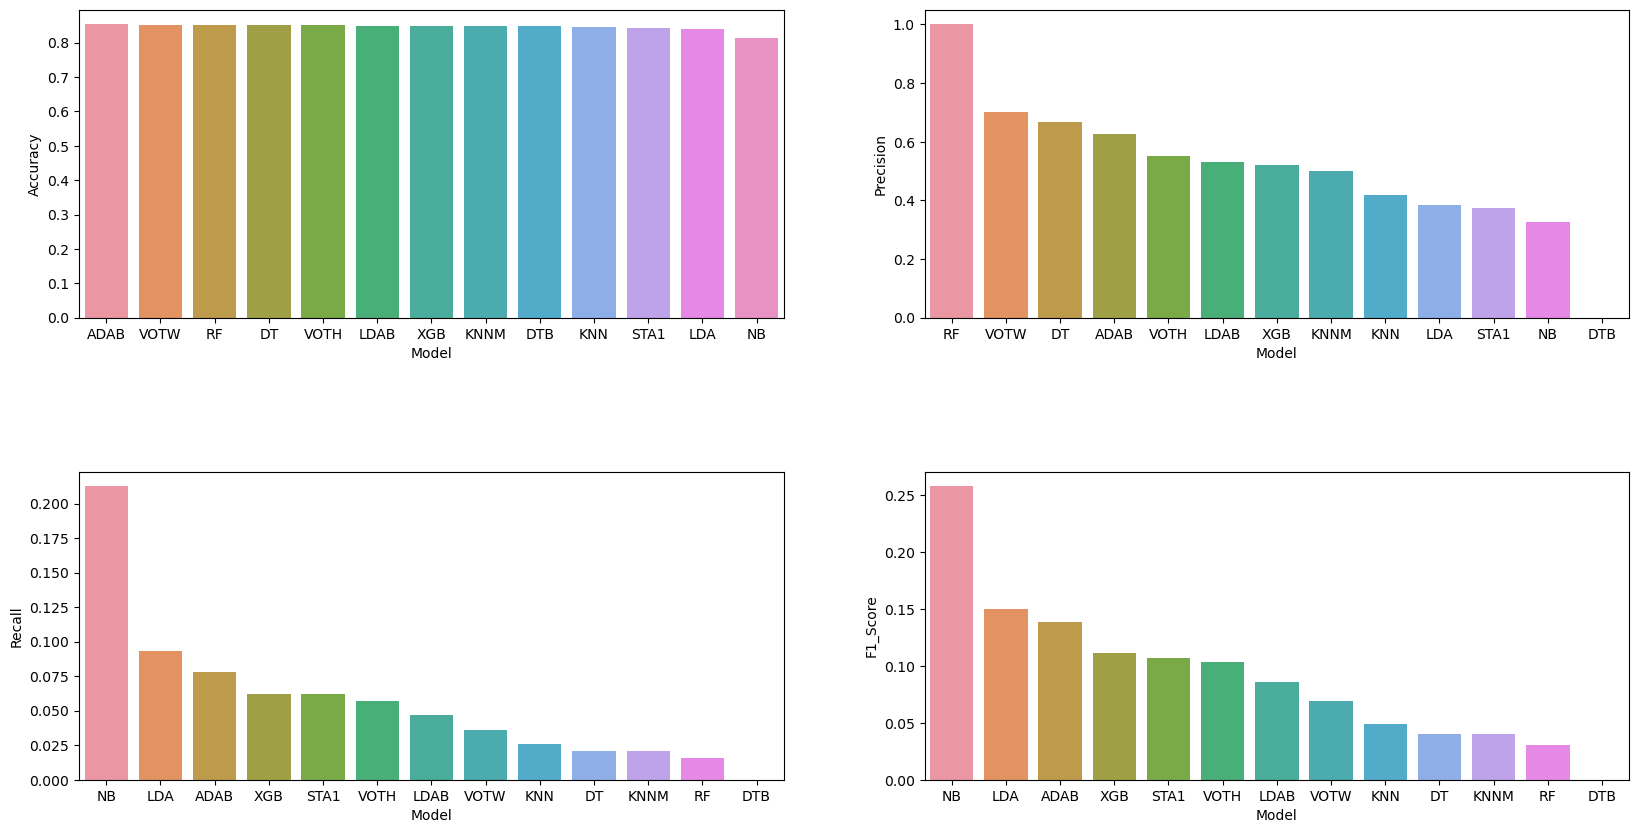

In [64]:
# Visualizing the model performance
fig,axes = plt.subplots(2,2,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)
cols = list(metric_df_test.columns)[1:]
for i,j in zip(cols,axes.flatten()):
    sns.barplot(x='Model',y=i,data=metric_df_test.sort_values(by = i,ascending=False),ax=j)

## Cut-Off Analysis

In [65]:
PP_test_ADA_model = ADA_model.predict_proba(X_test)[:,1]
cut_off = list(np.arange(0,1,0.005))
acc = []
pre = []
for i in cut_off:
    pred = np.where(PP_test_ADA_model>i,1,0)
    acc.append(accuracy_score(y_test,pred))
    pre.append(precision_score(y_test,pred,zero_division = 0))
cut_off_analysis = pd.DataFrame({'Cut_off':cut_off,'Accuracy':acc,'Precision':pre})    

Text(0.5, 1.0, 'Cut-off Analysis')

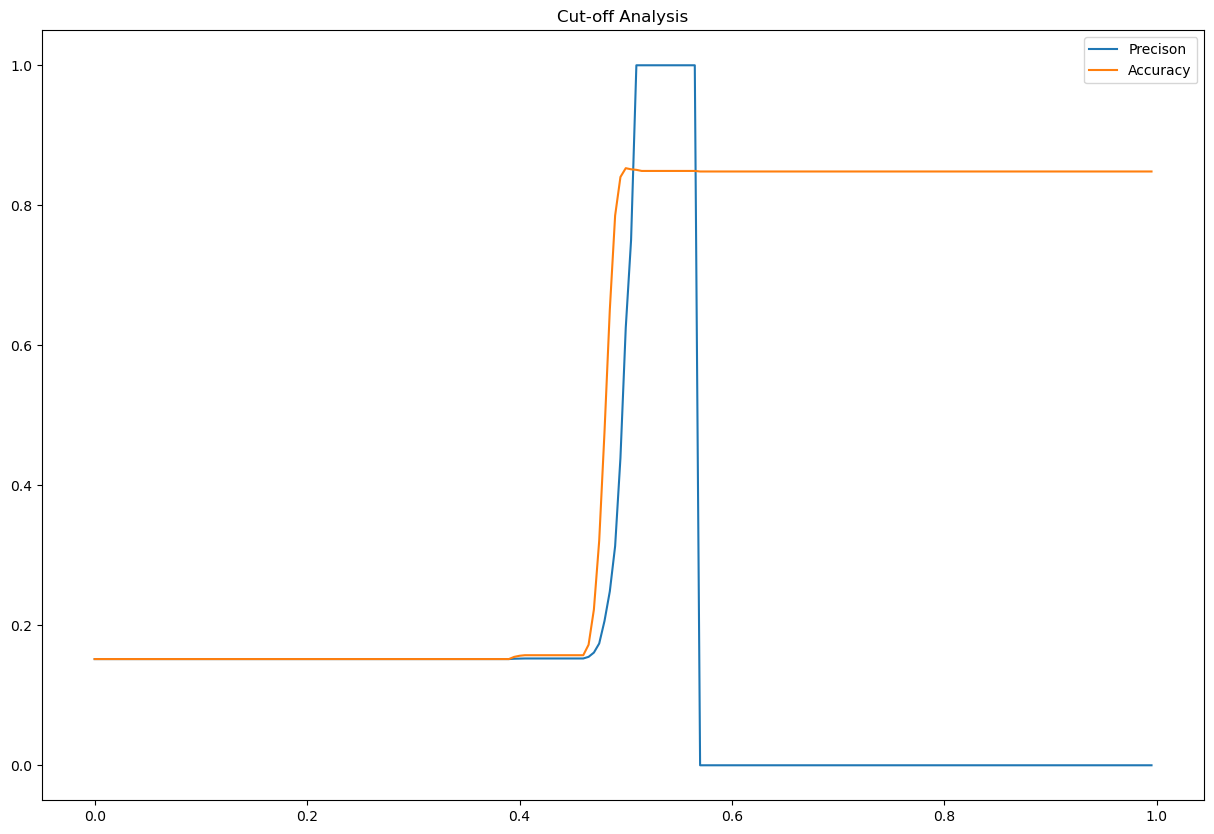

In [66]:
# Evaluating the threshold to get the best performance

fig,axes = plt.subplots(figsize = (15,10))
plt.plot(cut_off,cut_off_analysis['Precision'],label='Precison')
plt.plot(cut_off,cut_off_analysis['Accuracy'],label='Accuracy')
plt.legend()
plt.title('Cut-off Analysis')

In [67]:
cut_off_analysis.sort_values(by='Precision',ascending=False).head()

Cut_off  Accuracy  Precision
102    0.510  0.850629        1.0
113    0.565  0.849057        1.0
112    0.560  0.849057        1.0
111    0.555  0.849057        1.0
110    0.550  0.849057        1.0